# Scientific Literature Retriever Using BERT and CDQA

# **COVID-19 Open Research Dataset (CORD-19) Analysis**

Install the [End-To-End Closed Domain Question Answering System](http://pypi.org/project/cdqa/)

In [1]:
!pip install --upgrade pip

Upgrade the version of Pandas

In [ ]:
#!pip3 install --upgrade pandas

Import all necessary modules

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import re
import os
import json
import nltk 
from math import log, sqrt
from collections import defaultdict
from copy import deepcopy
import glob
import sys
import gzip, pickle, pickletools
from tabulate import tabulate
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Step 1. Data Pre-processing

Load csv to dataframe.

In [3]:
file_path = "../input/CORD-19-research-challenge/"

my_df =  pd.read_csv(file_path+'metadata.csv',low_memory=False)

my_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


Counting the number of valid entries for each column.

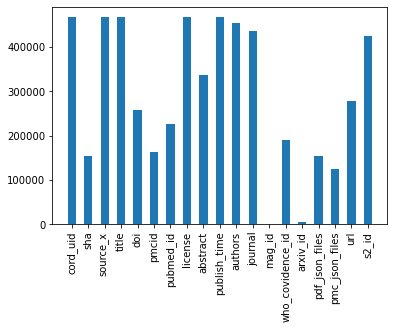

In [4]:
def display_barchart(my_df):
    column = my_df.columns.tolist()
    # https://datatofish.com/convert-pandas-dataframe-to-list/
    valid_cnt = list(my_df.count())
    plt.bar(column,valid_cnt,align = "center",width = 0.5,alpha = 1)
    plt.xticks(rotation=90)

    
display_barchart(my_df)

Removal of the duplicate entries.

In [5]:

my_df.drop_duplicates(subset=['title'],keep='first')
my_df.drop_duplicates(subset=['abstract'],keep='first')
my_df.drop_duplicates(subset=['doi'],keep='first')
my_df.count()



cord_uid            467521
sha                 154208
source_x            467521
title               467292
doi                 258305
pmcid               164024
pubmed_id           225737
license             467521
abstract            337989
publish_time        467302
authors             454218
journal             436081
mag_id                   0
who_covidence_id    191411
arxiv_id              6153
pdf_json_files      154208
pmc_json_files      123878
url                 277732
s2_id               425831
dtype: int64

Abstract plays an important role in finding related journals because it contains the objective or overview of the literature.


So here, We visualize it with bar chart to get insights.

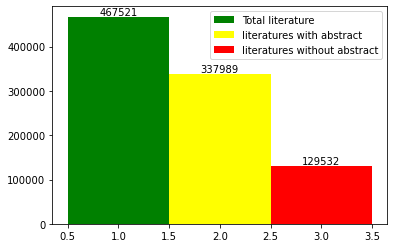

In [6]:

valid_cnt = list(my_df.count())
with_abstract = valid_cnt[8]
total = valid_cnt[0]
without_abstract  = total - with_abstract

tot = plt.bar(1,total,color='green',width = 1)
plt.annotate(str(total), xy=(1,total), ha='center', va='bottom')

abstract = plt.bar(2,with_abstract,color='yellow',width = 1)
plt.annotate(str(with_abstract), xy=(2,with_abstract), ha='center', va='bottom')

lost = plt.bar(3,without_abstract,color='red',width = 1)
plt.annotate(str(without_abstract), xy=(3,without_abstract), ha='center', va='bottom')

plt.legend((tot, abstract,lost), ('Total literature', 'literatures with abstract','literatures without abstract'))

Removal of the empty rows or in other words the rows without an abstract.

In [7]:
my_df.dropna(how='all')
my_df.dropna(subset=['abstract'],inplace=True)
my_df.count()


cord_uid            337989
sha                 128428
source_x            337989
title               337946
doi                 196383
pmcid               121370
pubmed_id           174859
license             337989
abstract            337989
publish_time        337787
authors             334949
journal             311258
mag_id                   0
who_covidence_id    126903
arxiv_id              6153
pdf_json_files      128428
pmc_json_files      100656
url                 212675
s2_id               311999
dtype: int64

Covid-19 is found in 2019.
So there is no need to keep literatures that was published before 2019.

Removal of the literatures that were published before the year 2019.

In [9]:
my_df = my_df[pd.DatetimeIndex(my_df.publish_time).year>2018]
# https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
my_df.info()

df = my_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265865 entries, 3479 to 467517
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          265865 non-null  object 
 1   sha               93545 non-null   object 
 2   source_x          265865 non-null  object 
 3   title             265822 non-null  object 
 4   doi               134495 non-null  object 
 5   pmcid             84481 non-null   object 
 6   pubmed_id         109773 non-null  object 
 7   license           265865 non-null  object 
 8   abstract          265865 non-null  object 
 9   publish_time      265865 non-null  object 
 10  authors           263569 non-null  object 
 11  journal           239853 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  125883 non-null  object 
 14  arxiv_id          5960 non-null    object 
 15  pdf_json_files    93545 non-null   object 
 16  pmc_json_files   

The papers i.e. literatures which do not contain any terms from "covid_terms" must be removed.

Filtering only papers related to Covid-19. 

In [10]:

my_df = df
covid_terms =['covid', 'coronavirus disease 19', 'sars cov 2', '2019 ncov', '2019ncov', '2019 n cov', '2019n cov',
              'ncov 2019', 'n cov 2019', 'coronavirus 2019', 'wuhan pneumonia', 'wuhan virus', 'wuhan coronavirus',
              'coronavirus 2', 'covid-19', 'SARS-CoV-2', '2019-nCov']
covid_terms = [elem.lower() for elem in covid_terms]
covid_terms = re.compile('|'.join(covid_terms))

def checkYear(date):
    return int(date[0:4])

def checkCovid(row, covid_terms):
    return bool(covid_terms.search(row['abstract'].lower())) and checkYear(row['publish_time']) > 2019



In [11]:
my_df['is_covid'] = my_df.apply(checkCovid, axis=1, covid_terms=covid_terms)
my_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,is_covid
3479,gcj14snd,1d05dbf38f98918269d71020f0c9ff616548c2df,PMC,Human rhinovirus spatial-temporal epidemiology...,10.12688/wellcomeopenres.14836.2,PMC6234744,30483602,cc-by,Background: Human rhinovirus (HRV) is the pred...,2019-03-27,"Morobe, John Mwita; Nyiro, Joyce U.; Brand, Sa...",Wellcome Open Res,NaN,NaN,NaN,document_parses/pdf_json/1d05dbf38f98918269d71...,document_parses/pmc_json/PMC6234744.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,False
3561,qlwzl5mq,4c7f6c52fe043745887db5406196b1d5099c9614,PMC,Multiple Introductions of Domestic Cat Feline ...,10.3201/eid2501.181347,PMC6302599,30561312,no-cc,The endangered Florida panther (Puma concolor ...,2019-01-22,"Chiu, Elliott S.; Kraberger, Simona; Cunningha...",Emerg Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/4c7f6c52fe043745887db...,document_parses/pmc_json/PMC6302599.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,False
3580,eqgc8v7y,e5c06914d0daee6e881665b23adca340d0a6271a,PMC,Impact of glucose-6-phosphate dehydrogenase de...,10.1371/journal.pone.0209204,PMC6314580,30601843,cc-by,Glucose-6-phosphate dehydrogenase (G6PD) defic...,2019-01-02,"May, Win Lai; Kyaw, Myat Phone; Blacksell, Stu...",PLoS One,NaN,NaN,NaN,document_parses/pdf_json/e5c06914d0daee6e88166...,document_parses/pmc_json/PMC6314580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,False
3592,c22kw6f4,ae56d60debc175395e6269fc5bf9184291e71a56,PMC,Improvement in the survival rates of extracorp...,10.1186/s13054-018-2293-5,PMC6318967,30606235,cc-by,BACKGROUND: Although the utilization of extrac...,2019-01-03,"Baek, Moon Seong; Lee, Sang-Min; Chung, Chi Ry...",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/ae56d60debc175395e626...,document_parses/pmc_json/PMC6318967.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,False
3593,hbpk850a,ca8f30a35b564945dd2588c382a0e181a1e08662,PMC,Mental health workers perceptions of disaster ...,10.1186/s12889-018-6313-9,PMC6318987,30606149,cc-by,BACKGROUND: The post-disaster mental health cr...,2019-01-03,"Xi, Yingjun; Chen, Runsen; Gillespie, Amy L.; ...",BMC Public Health,NaN,NaN,NaN,document_parses/pdf_json/ca8f30a35b564945dd258...,document_parses/pmc_json/PMC6318987.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,False


In [12]:
df_covid_only = my_df[my_df['is_covid']==True]
df_covid_only = df_covid_only.reset_index(drop=True)
df_covid_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186764 entries, 0 to 186763
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          186764 non-null  object 
 1   sha               61542 non-null   object 
 2   source_x          186764 non-null  object 
 3   title             186731 non-null  object 
 4   doi               82347 non-null   object 
 5   pmcid             53654 non-null   object 
 6   pubmed_id         67060 non-null   object 
 7   license           186764 non-null  object 
 8   abstract          186764 non-null  object 
 9   publish_time      186764 non-null  object 
 10  authors           186082 non-null  object 
 11  journal           166422 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  101382 non-null  object 
 14  arxiv_id          3365 non-null    object 
 15  pdf_json_files    61542 non-null   object 
 16  pmc_json_files    43

Considering the topic we choose, we store the terms related it in "key_words" list. And we filter papers based on the listed terms. 

Filtering the literatures based on the terms present in the "key_word" list.

In [13]:
key_words = ['transmission','transmitted','long','symptomatic','asymptomatic','infected','infection','range', 'incubation', 'periods', 'surfaces', 'prevent','protective','SARS-CoV-2','infectious','reported','respiratory', 'secretions', 'saliva', 'droplets','short', 'time', 'fomites','sanitation']
pattern = '|'.join(key_words)
df_covid_only = df_covid_only.loc[df_covid_only['abstract'].str.contains(pattern, case=False)]
df_covid_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154520 entries, 0 to 186763
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          154520 non-null  object 
 1   sha               53018 non-null   object 
 2   source_x          154520 non-null  object 
 3   title             154497 non-null  object 
 4   doi               70127 non-null   object 
 5   pmcid             45380 non-null   object 
 6   pubmed_id         56661 non-null   object 
 7   license           154520 non-null  object 
 8   abstract          154520 non-null  object 
 9   publish_time      154520 non-null  object 
 10  authors           154113 non-null  object 
 11  journal           138066 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  82128 non-null   object 
 14  arxiv_id          2634 non-null    object 
 15  pdf_json_files    53018 non-null   object 
 16  pmc_json_files    37

Ploting a bar graph related to above result.

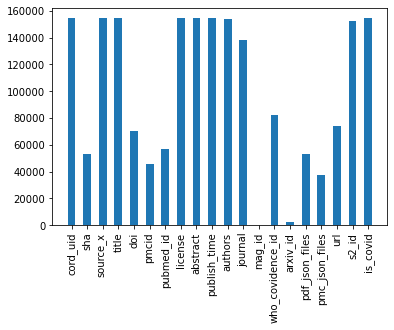

In [14]:
df_covid_only.head().abstract
display_barchart(df_covid_only)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53018 entries, 0 to 186763
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          53018 non-null  object 
 1   sha               53018 non-null  object 
 2   source_x          53018 non-null  object 
 3   title             53018 non-null  object 
 4   doi               51223 non-null  object 
 5   pmcid             41902 non-null  object 
 6   pubmed_id         39804 non-null  object 
 7   license           53018 non-null  object 
 8   abstract          53018 non-null  object 
 9   publish_time      53018 non-null  object 
 10  authors           52969 non-null  object 
 11  journal           43485 non-null  object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      object 
 14  arxiv_id          1933 non-null   object 
 15  pdf_json_files    53018 non-null  object 
 16  pmc_json_files    35287 non-null  objec

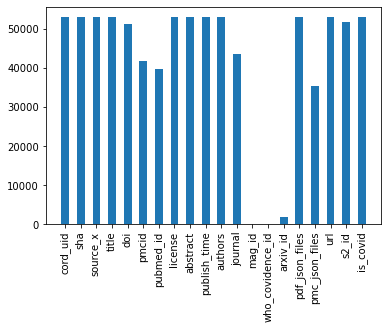

In [15]:

df_covid_only.dropna(subset=['pdf_json_files'],inplace=True)
df_covid_only.info()
display_barchart(df_covid_only)

# Step 2. Extraction of data from json files to dataframe format

Path to json files

In [16]:
base_path = '../input/CORD-19-research-challenge/'
all_selected_json = df_covid_only['pdf_json_files']
print(base_path+all_selected_json[0])

../input/CORD-19-research-challenge/document_parses/pdf_json/5a17ed3e4abf295f5820c65f56398266c1baae98.json


In [17]:
# This piece of code was adopted from the original source at:
# https://www.kaggle.com/xhlulu/cord-19-eda-parse-json-and-generate-clean-csv/notebook 

def format_name(author):
    middle_name = " ".join(author['middle'])
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])

def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    for section, text in texts:
        texts_di[section] += text
    body = ""
    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))
    return "; ".join(formatted)

def load_files(file_count,filenames_selected = all_selected_json):

    raw_files = []
    i = 0
    for filename in filenames_selected:
        if i == file_count:
            break
        
        try:
            file = json.load(open(filename, 'rb'))
            raw_files.append(file)   
            i = i+1
        except:
            try:
                filename = base_path + filename
                file = json.load(open(filename, 'rb'))
                raw_files.append(file)
                i = i+1
            except:
                x = 1
    return raw_files
    

def generate_clean_df(all_files):
    cleaned_files = []

    for file in all_files:

        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]
        cleaned_files.append(features)
    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']
    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df = clean_df.drop(columns=['authors','affiliations','bibliography',
                                      'raw_authors','raw_bibliography'])
    return clean_df

In [18]:
!pip install cdqa 

     |████████████████████████████████| 45 kB 1.3 MB/s eta 0:00:011
     |████████████████████████████████| 94 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 278 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.4 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 311 kB 48.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.7 MB 41.7 MB/s eta 0:00:01
     |████████████████████████████████| 748.9 MB 417 bytes/s a 0:00:01    |█                               | 24.5 MB 26.9 MB/s eta 0:00:27     |██▏                             | 50.7 MB 47.4 MB/s eta 0:00:15     |██▎                             | 54.1 MB 47.4 MB/s eta 0:00:15     |██▌                             | 59.5 MB 47.4 MB/s eta 0:00:15     |██▋                             | 60.9 MB 47.4 MB/s eta 0:00:15     |███                             | 68.4 MB 47.4 MB/s eta 0:00:15 MB 47.4 MB/s eta 0:00:15█▍                    | 266.1 MB 41.8 MB/s eta 0:00:12     |███████████▊         

    Uninstalling transformers-4.2.2:
      Successfully uninstalled transformers-4.2.2
  Attempting uninstall: torch
    Found existing installation: torch 1.7.0
    Uninstalling torch-1.7.0:
      Successfully uninstalled torch-1.7.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
  Attempting uninstall: prettytable
    Found existing installation: prettytable 2.0.0
    Uninstalling prettytable-2.0.0:
      Successfully uninstalled prettytable-2.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.2
    Uninstalling pandas-1.2.2:
      Successfully uninstalled pandas-1.2.2
  Attempting uninstall: markdown
    Found existing installation: Markdown 3.3.3
    Uninstalling Markdown-3.3.3:
      Successfully uninstalled Markdown-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are instal

# Step 3. Corpus formation

In [19]:
def get_corpus():
    num_of_papers = {}
    corpus = pd.DataFrame(columns=['paper_id','title','abstract','text'])
    
    file_count = 40000
    
    print('Reading ', file_count, 'json files')
    print('Loading......')
    files = load_files(file_count)
    print('Generating clean dataframe')
    df = generate_clean_df(files)
    print('Generated......')
    print('Forming Corpus.......')
    print(df.shape[0])
    corpus = pd.concat([corpus, df], ignore_index=True, sort=False)
    print('4')
    
    print('Corpus includes {0} scientific articles.'.format(len(corpus)))
    return corpus, num_of_papers

corpus, num_of_papers = get_corpus()

Reading  40000 json files
Loading......
Generating clean dataframe
Generated......
Forming Corpus.......
40000
4
Corpus includes 40000 scientific articles.


# Step 4. Processing of Corpus

In [20]:
# This processing algorithm can originaly be found at:
# https://github.com/nilayjain/text-search-engine

inverted_index = defaultdict(list)
num_of_documents = len(corpus)
vects_for_docs = [] 
document_freq_vect = {}
 
def iterate_over_all_docs():
    print('Processing corpus...')
    for i in range(num_of_documents):
        if np.mod(i, 1000) == 0:
            print('{0} of {1}'.format(str(i).zfill(len(str(num_of_documents))),num_of_documents))
        doc_text = corpus['title'][i] + ' ' + corpus['abstract'][i] + ' ' + corpus['text'][i]
        token_list = get_tokenized_and_normalized_list(doc_text)
        vect = create_vector(token_list)
        vects_for_docs.append(vect)
    print('{0} of {1}'.format(num_of_documents, num_of_documents))

def create_vector_from_query(l1):
    vect = {}
    for token in l1:
        if token in vect:
            vect[token] += 1.0
        else:
            vect[token] = 1.0
    return vect

def generate_inverted_index():
    count1 = 0
    for vector in vects_for_docs:
        for word1 in vector:
            inverted_index[word1].append(count1)
        count1 += 1

def create_tf_idf_vector():
    vect_length = 0.0
    for vect in vects_for_docs:
        for word1 in vect:
            word_freq = vect[word1]
            temp = calc_tf_idf(word1, word_freq)
            vect[word1] = temp
            vect_length += temp ** 2
        vect_length = sqrt(vect_length)
        for word1 in vect:
            vect[word1] /= vect_length

def get_tf_idf_from_query_vect(query_vector1):
    vect_length = 0.0
    for word1 in query_vector1:
        word_freq = query_vector1[word1]
        if word1 in document_freq_vect:
            query_vector1[word1] = calc_tf_idf(word1, word_freq)
        else:
            query_vector1[word1] = log(1 + word_freq) * log(
                num_of_documents)
        vect_length += query_vector1[word1] ** 2
    vect_length = sqrt(vect_length)
    if vect_length != 0:
        for word1 in query_vector1:
            query_vector1[word1] /= vect_length

def calc_tf_idf(word1, word_freq):
    return log(1 + word_freq) * log(num_of_documents / document_freq_vect[word1])

def get_dot_product(vector1, vector2):
    if len(vector1) > len(vector2):
        temp = vector1
        vector1 = vector2
        vector2 = temp
    keys1 = vector1.keys()
    keys2 = vector2.keys()
    sum = 0
    for i in keys1:
        if i in keys2:
            sum += vector1[i] * vector2[i]
    return sum

def get_tokenized_and_normalized_list(doc_text):
    tokens = nltk.word_tokenize(doc_text)
    ps = nltk.stem.PorterStemmer()
    stemmed = []
    for words in tokens:
        stemmed.append(ps.stem(words))
    return stemmed

def create_vector(l1):
    vect = {}  
    global document_freq_vect
    for token in l1:
        if token in vect:
            vect[token] += 1
        else:
            vect[token] = 1
            if token in document_freq_vect:
                document_freq_vect[token] += 1
            else:
                document_freq_vect[token] = 1
    return vect

def get_result_from_query_vect(query_vector1):
    parsed_list = []
    for i in range(num_of_documents - 0):
        dot_prod = get_dot_product(query_vector1, vects_for_docs[i])
        parsed_list.append((i, dot_prod))
        parsed_list = sorted(parsed_list, key=lambda x: x[1])
    return parsed_list

# ../input/CORD-19-research-challenge
def pickle_to_file(file_name,object_to_pickle):
    filepath = "./data/"+file_name
    with gzip.open(filepath, "wb") as f:
        pickled = pickle.dumps(object_to_pickle)
        optimized_pickle = pickletools.optimize(pickled)
        f.write(optimized_pickle)
        
def pickle_all():
    pickle_to_file("inverted_index.pkl",inverted_index)
    pickle_to_file("vects_for_docs.pkl",vects_for_docs)
    pickle_to_file("document_freq_vect.pkl",document_freq_vect)
    
iterate_over_all_docs()
generate_inverted_index()
create_tf_idf_vector()
# pickle_all()

Processing corpus...
00000 of 40000
01000 of 40000
02000 of 40000
03000 of 40000
04000 of 40000
05000 of 40000
06000 of 40000
07000 of 40000
08000 of 40000
09000 of 40000
10000 of 40000
11000 of 40000
12000 of 40000
13000 of 40000
14000 of 40000
15000 of 40000
16000 of 40000
17000 of 40000
18000 of 40000
19000 of 40000
20000 of 40000
21000 of 40000
22000 of 40000
23000 of 40000
24000 of 40000
25000 of 40000
26000 of 40000
27000 of 40000
28000 of 40000
29000 of 40000
30000 of 40000
31000 of 40000
32000 of 40000
33000 of 40000
34000 of 40000
35000 of 40000
36000 of 40000
37000 of 40000
38000 of 40000
39000 of 40000
40000 of 40000


In [21]:
'''Tried pickling for direct access to corpus and document vector''' 
           
# def load_all_from_pickle():
#     print("inverted_index loading...")
#     filepath = "../input/pickle-files/inverted_index.pkl"
#     with gzip.open(filepath, 'rb') as f:
#         p = pickle.Unpickler(f)
#         global inverted_index
#         inverted_index = p.load()
#         print(sys.getsizeof(inverted_index))
#     print("inverted_index loaded.")
    
#     print("vects_for_docs loading...")   
#     filepath = "../input/pickle-files/vects_for_docs.pkl"
#     with gzip.open(filepath, 'rb') as f:
#         global vects_for_docs
#         p = pickle.Unpickler(f)
#         vects_for_docs = p.load()
#         print(len(vects_for_docs))
#     print("vects_for_docs loaded.")
        
#     print("document_freq_vect loading...")    
#     filepath = "../input/pickle-files/document_freq_vect.pkl"
#     with gzip.open(filepath, 'rb') as f:
#         global document_freq_vect
#         p = pickle.Unpickler(f)
#         document_freq_vect = p.load()
#         print(sys.getsizeof(document_freq_vect))
#     print("document_freq_vect loaded.")
        

# load_all_from_pickle()

'Tried pickling for direct access to corpus and document vector'

# Step 5. Using pretrained BERT model

In [22]:
# The End-To-End Closed Domain Question Answering System is used here.
# It is available at: https://pypi.org/project/cdqa/

from cdqa.utils.filters import filter_paragraphs
from cdqa.utils.download import download_model, download_bnpp_data
from cdqa.pipeline.cdqa_sklearn import QAPipeline

download_bnpp_data(dir='./data/bnpp_newsroom_v1.1/')
download_model(model='bert-squad_1.1', dir='./models')

# Step 6. Search of the most relevant articles and competent answer on the query

First, for each query the system arranges all the scientific papers within the corpus in the relevant order.

Second, the system analize texts of top N the mosr relevant papers to answer to the query in the best way.

In [23]:
def add_Each_Details(papers_info,top_n_papers,prediction,query,x,result):
    for i in range(top_n_papers):
        if papers_info['title'][i] == prediction[x][1]:
            pid = papers_info['id'][i]

#     print(x+1,'. PAPER ID : {0}\n'.format(pid))
#     print('POSSIBLE ANSWER FROM PAPER: {0}\n'.format(prediction[x][0]))
#     print('PAPER TITLE: {0}\n'.format(prediction[x][1]))
#     print('HIGHLIGHT FROM PAPER: {0}\n'.format(prediction[x][2]))
    temp = pd.DataFrame({"Paper ID":[pid], "Paper Title":[prediction[x][1]], "Highlight from Paper":[prediction[x][2]],"Short answer":[prediction[x][0]]})
    result = result.append(temp,ignore_index= True)
    
    return result
    
    
def find_relevant_articles(query=None, top_n_papers=20, min_n_papers=3):
    if query == None:
        query = input('Please enter your query...')
#     print('\n\n'+'*'*34+' PROCESSING NEW QUERY '+'*'*34+'\n')  
    
    query_list = get_tokenized_and_normalized_list(query)
    query_vector = create_vector_from_query(query_list)
    get_tf_idf_from_query_vect(query_vector)
    result_set = get_result_from_query_vect(query_vector)
    
    papers_info = {'query':query, 'query list':query_list, 'query vector':query_vector,
                   'id':[], 'title':[], 'abstract':[], 'text':[], 'weight':[], 'index':[]}
    
    for i in range(1, top_n_papers+1):
        tup = result_set[-i]
        papers_info['id'].append(corpus['paper_id'][tup[0]])
        papers_info['title'].append(corpus['title'][tup[0]])
        papers_info['abstract'].append(corpus['abstract'][tup[0]])
        papers_info['text'].append(corpus['text'][tup[0]])
        papers_info['weight'].append(tup[1])
        papers_info['index'].append(tup[0])
        
    colms = ['date','title', 'category', 'link', 'abstract', 'paragraphs']
    df = pd.DataFrame(columns=colms)

    for i in range(len(papers_info['text'])):
        papers_info['text'][i] = papers_info['text'][i].replace('\n\n', ' ')
        CurrentText = papers_info['text'][i]
        CurrentText = CurrentText.split('. ')
        CurrentList = ["None", papers_info['title'][i], "None", "None", papers_info['abstract'][i], CurrentText]
        CurrentList = np.array(CurrentList)
        CurrentList = CurrentList.reshape(1, CurrentList.shape[0])
        CurrentList = pd.DataFrame(data = CurrentList, columns=colms)
        df = pd.concat([df, CurrentList], ignore_index=True)
    df = filter_paragraphs(df)

    # Loading QAPipeline with CPU version of BERT Reader pretrained on SQuAD 1.1
    cdqa_pipeline = QAPipeline(reader='models/bert_qa.joblib')

    #Drop possible duplicates
    df.drop_duplicates(subset=['title'],keep='first')
    df.drop_duplicates(subset=['link'],keep='first')
    df.dropna(subset=['title'],inplace=True)
    # Fitting the retriever to the list of documents in the dataframe
    cdqa_pipeline.fit_retriever(df=df)

    query = papers_info['query']

    # Sending a question to the pipeline and getting prediction
    prediction = cdqa_pipeline.predict(query=query,n_predictions = min_n_papers)
    
    #Creating result dataframe
    column_names = ["Paper ID", "Paper Title", "Highlight from Paper","Short answer"]
    result = pd.DataFrame(columns = column_names)
    
    
    print('QUERY: {0}\n'.format(query))
#     display(HTML('QUERY: '+query))
    for i in range(min_n_papers):
        result = add_Each_Details(papers_info,top_n_papers,prediction,query,i,result)
       
    display(HTML(result.to_html()))

# Step 7. Getting practical answers and the most relevant papers (query based approach)

Below one can see a list of 10 queries and answers, which have been found by the system due to text mining.

List of queries

# How to use the system

When Steps 0-7 have been completed with a corpus of scientific papers, the system is ready to process your queries. To get an answer to a query, follow two steps: 

1. Input any query in the form of string type variable.

For example,

2. Call the function find_relevant_articles().

For example,

In [24]:
query = 'What is the incubation period for covid19 ?'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

100%|██████████| 231508/231508 [00:00<00:00, 4531629.59B/s]


QUERY: What is the incubation period for covid19 ?



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,44e33254ff9d269350bd34fd7a634b1b69c01cf0,Association between incubation period and clinical characteristics of patients with COVID-19,"Compared with patients who had a longer incubation period (>7 days), those with a shorter incubation period ( 7 days) were significantly more likely to have severe disease at diagnosis (p < 0.01), a longer duration of hospitalization (p < 0.01), and a longer time from symptom onset to discharge (p < 0.01)",>7 days
1,e6658641a4458e350be1b2ce6bdf7b0eba0edf66,Prediction of the incubation period for COVID-19 and future virus disease outbreaks,"Despite having trained the model on an imbalanced training set biased towards shorter incubation periods, the model predicts an incubation period of 8.8 days for SARS-CoV-2, correctly placing SARS-CoV-2 in the upper range of incubation periods and predicting an incubation period duration during which current research indicates the majority of symptomatic patients will have shown symptoms",8.8 days
2,fd96fc1859201e13e35526c188e022fa6e335327,Transmission of corona virus disease 2019 during the incubation period may lead to a quarantine loophole,"Discussion Our study initially demonstrated asymptomatic transmission of COVID-19 in the incubation period, especially in the last three days of incubation period, by estimating the incubation period with the use of accurate exposure history of confirmed cases.Among the clusters, we found that four secondary cases had symptom onset earlier than their first-generation cases, which further provides the evidence of the transmission during the incubation period",the last three days
3,dda0c8d0098ee1c6f18de9e91f64fe00485c0228,Epidemiology and Infection,"Conclusion We found that incubation period of locally-acquired COVID-19 cases in Singapore ranged from 1 to 12 days with a median of 5 days, supporting the existing use of 14 days to apply duration of quarantine and twice the maximum incubation period for monitoring and closure of active clusters of transmission in Singapore",1 to 12 days
4,b476b1638a4afbaee95e089495b37bd0f34bfb78,,"In the preprint, the authors state that the ""median incubation period was 3 days (range, 0 to 24 days)"" [13] , a shorter median incubation period than previously reported and a vastly wider range than previously thought.Based on the preprint article, on the 12th of February, the national newspaper in Singapore (The Straits Times) reported that the incubation period for COVID-19 could stretch out to 24 days [14] , acknowledging this was based on a non-peer-reviewed preprint",24 days


In [25]:
query = 'What is range of incubation period for coronavirus SARS-CoV-2 COVID-19 in humans'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is range of incubation period for coronavirus SARS-CoV-2 COVID-19 in humans



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,e6658641a4458e350be1b2ce6bdf7b0eba0edf66,Prediction of the incubation period for COVID-19 and future virus disease outbreaks,"Despite having trained the model on an imbalanced training set biased towards shorter incubation periods, the model predicts an incubation period of 8.8 days for SARS-CoV-2, correctly placing SARS-CoV-2 in the upper range of incubation periods and predicting an incubation period duration during which current research indicates the majority of symptomatic patients will have shown symptoms",8.8 days
1,85cf986509bb29f40bd5776ffaf8678f211a0259,Prediction of the virus incubation period for COVID-19 and future outbreaks,"Despite having been trained on an imbalanced training set, the 203 model predicts an incubation period of 8.8 days for SARS-CoV-2, correctly placing SARS-CoV-2 in the 204 upper range of incubation periods, well within the confidence interval, and predicting an incubation 205 period duration during which the vast majority of symptomatic patients will have shown symptoms 17",204
2,ee19ccaa8d06fb07c9290d8f3b7c6b147e225125,Antibody Immunological Imprinting on COVID-19 Patients,"While Severe Acute Respiratory Syndrome Coronavirus 1 (SARS-CoV-1) and Middle East Respiratory Syndrome Coronavirus (MERS-CoV), are highly pathogenic betacoronaviruses that caused zoonotic outbreaks in humans in the last 20 years (4, 5) , the alphacoronaviruses 223E and NL63, and the betacoronaviruses OC43 and HKU1, frequently cause mild upper respiratory disease and have been circulating in humans for at least 100 years (3, 6)","3, 6)"
3,9ab7f5e4ad8f2472c55258955a2a54ff8b1564a6,Tropical Medicine and Infectious Disease Lung Involvement Found on Chest CT Scan in a Pre-Symptomatic Person with SARS-CoV-2 Infection: A Case Report,"2020, 5, 56 2 of 3 coronavirus-2 (SARS-CoV-2) was obtained, and a positive real-time reverse-transcriptase polymerase chain reaction (rRT-PCR) assay confirmed the diagnosis of COVID-19 infection.Based on the Iranian interim guideline for ""clinical management of COVID-19"" published in February 2020, the decision for the use of antiviral and antimalarial therapy was made considering the patient's diagnosis of SARS-CoV-2 infection [4]","5, 56 2"
4,c0dcf251d963d65a44d8f522bd67ce9a2a6afb75,Incubation period of SARS-CoV-2: A systematic review and meta-analysis Incubation period of SARS-CoV-2: A systematic review and meta-analysis,"The global health initiatives as well as local health planners should consider, this average incubation period while designing optimal prevention and control strategies for SARS-CoV-2.Keywords: SARS-CoV-2, COVID-19, incubation period, systematic review, meta-analysis Background The incubation period of an infectious disease is the time period from the initial exposure to the infectious agent until the appearance of the signs and symptoms of the disease",the time period from the initial exposure to the infectious agent until the appearance of the signs and symptoms of the disease


In [26]:
query = 'What is optimal quarantine period for coronavirus COVID-19'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is optimal quarantine period for coronavirus COVID-19



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,64e951755dc23ff7d58ebb396e83a491b4d2fca2,Asymptomatic cases with SARS-CoV-2 infection,"1 | WHAT IS ASYMPTOMATIC INFECTION? Recently, ""asymptomatic infection,"" also known as ""hidden coronavirus infections"" (https://www.sciencemag.org/news/2020/02/labs-scramblespot-hidden-coronavirus-infections#) or ""covert coronavirus infections"" There are two classes of asymptomatic cases with SARS-CoV-2 infection: first, cases with little or mild symptoms within the incubation period but with symptoms onset in the coming 14-day quarantine period or typical changes on the chest-radiograph",14-day quarantine period
1,7027e1f4e30f01ee8cbfe4147f9b493ff58cc2b1,Estimation of incubation period distribution of COVID-19 using disease onset forward time: A novel cross-sectional and forward follow-up study,"One of the critical factors to determine the optimal quarantine of presymptomatic individuals is a good understanding of the incubation period, and this has been lacking for COVID-19.The incubation period of an infectious disease is the time elapsed between infection and appearance of the first symptoms and signs of disease",incubation period
2,a9969432e7f51736a4592d5844dd25faf2269458,Optimal quarantine control of an infectious outbreak,"Assuming that the overall available capacity is described by α c , this capacity limitation can be described as theIn this work, the goal is to obtain an optimal quarantine control policy u ( t ), t ∈ [0, t f ] for a fixed final time t f , that minimizes a weighted combination of the total number of infections and the overall number of quarantined individuals at time t f","u ( t ), t ∈ [0, t f ] for a fixed final time t f"
3,b63f43c368f68f4b3bed56cc92edc8e5d5d6d97c,Inferring incubation period distribution of COVID-19 based on SEAIR Model,"For instance, the optimal quarantine period can be determined according to the distribution of incubation period.Although the incubation period is of great importance, it is not easy to obtain the accurate distribution of incubation period under data limitation.The existing literature regarding the estimation of incubation period of COVID-19 mainly relies on sampling and surveys from the infected people",according to the distribution of incubation period
4,09d7cdf15c1a5035287ab321af6c83fd4d6df350,Indemnifying precaution: economic insights for regulation of a highly infectious disease,"For instance, those who are financially insecure and without any sickleave program that would provide compensation during the quarantine period would have incentive to avoid the test to prevent loss of income.For COVID-19 across all these particular policy tactics, the fundamental mechanism must be to reduce the costs associated with individuals taking precautions, so that the net individual cost of precaution is lower than not taking the precaution",the fundamental mechanism must be to reduce the costs associated with individuals taking precautions


In [27]:
query = 'What is effective quarantine period for coronavirus COVID-19'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is effective quarantine period for coronavirus COVID-19



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,64e951755dc23ff7d58ebb396e83a491b4d2fca2,Asymptomatic cases with SARS-CoV-2 infection,"1 | WHAT IS ASYMPTOMATIC INFECTION? Recently, ""asymptomatic infection,"" also known as ""hidden coronavirus infections"" (https://www.sciencemag.org/news/2020/02/labs-scramblespot-hidden-coronavirus-infections#) or ""covert coronavirus infections"" There are two classes of asymptomatic cases with SARS-CoV-2 infection: first, cases with little or mild symptoms within the incubation period but with symptoms onset in the coming 14-day quarantine period or typical changes on the chest-radiograph",14-day quarantine period
1,6a44b577f846eae8e62f83f122f0f787aaefafe3,Quarantine and testing strategies in contact tracing for SARS-CoV-2,"Discussion The number of days secondary cases spend infectious prior to testing of the index case and tracing of contacts is dependent on the delays from the onset of symptoms of the index case to tracing of the secondary case, some of which can be reduced by more effective sensitisation of the public to COVID-19 symptoms, and more effective tracing systems.We find that, provided the time from the index case's symptom onset to tracing of secondary contacts are moderately short ( 4.5 days on average, comprising 2 days for onset to a test and 2.5 days on average for all ≤ subsequent tracing), a quarantine period of at least 10 days may largely emulate the 14 day quarantine period in the reduction of traced infectious individuals entering the community",at least 10 days
2,37420f178967d97eec1bc27c4f7d37e921233d8e,,"11 Hence it is important to be careful to emphasize Combating COVID-19 in Bangladesh: ideal duration of mandatory quarantine period and policy implications Atik Ahsan 1 , Rownak Jahan Archie 2 and James B Tidwell 3 2 Infectious Diseases: Research and Treatment other aspects of Coronavirus prevention; limiting preventive messaging to only hand washing is not enough to restrict the spread of the Coronavirus",ideal duration of mandatory quarantine period and policy implications
3,7047464fa8eede2eb8e72308dd928ecf4fbb1a7e,"Behavioral Fatigue: Real Phenomenon, Naïve Construct, or Policy Contrivance?","(2020) , ""one senior Whitehall source said Whitty himself was the main advocate of the 'fatigue' notion, based partly on his own experience of patients in medical practice who 1 https://www.youtube.com/watch?v=Yc1alOEjDVA 2 www.gov.uk/government/publications/sage-minutes-coronavirus-covid-19-response-13march-2020 3 It is still possible that Halpern himself provided the advice personally rather than as a BIT member.do not see drug prescriptions through to their completion",response-13march-2020 3
4,aeae83b3fc5c07dddb48347e3e835e574e9282a5,Strategies to reduce the risk of SARS-CoV-2 re- introduction from international travellers,"Compared to only syndromic screening, a 7-day quarantine period reduced the number of remaining infectious days from travellers from the EU to a median of 0 days (mean: 1.4 days; 95% UI: (0.00, 8.7) days), a RR of 0.34 (95% UI: (0.01, 1)) and from the USA to Requiring a second round of testing in addition to quarantine and a single test had little marginal impact, although a quarantine period of over 8 days with two tests may be able to largely replicate the impact of a 14day quarantine period (Fig 4B)",over 8 days


In [28]:
query = 'What is percentage of death cases for coronavirus SARS-CoV-2 COVID-19'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is percentage of death cases for coronavirus SARS-CoV-2 COVID-19



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,86592ff90abf1476d7ead1b5ad2c2369d76ed3b1,Updates on laboratory investigations in coronavirus disease 2019 (COVID-19),"Pragmatic indications for pooling samples for molecular diagnosis of severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)• The strategy must be used for screening but not for investigating suspected (symptomatic) cases• The prevalence of coronavirus disease 2019 (COVID-19) is <1%• Clinical samples rather than RNA shall be pooled• The molecular assay has been validated for this purpose (e.g., adequate analytical sensitivity)• The pool is composed by no more than 10 clinical samples (preferably 5)• The presence of interfering substances (e.g., antiviral therapy) has been ruled out (42), which evaluated many of these devices for measuring anti-SARS-CoV-2 IgM and IgG",<1%
1,67e72527326be0d401d927cbd1a7e878b23b6efb,Clinical features of critically ill patients infected with SARS-CoV-2 outside Wuhan with and without diabetes,"infectious diseases with high mortality rates of 10% for SARS-CoV [4] and 37% for MERS-CoV [5] .On Jan 7, 2020, a novel coronavirus was identified by the Chinese Center for Disease Control and Prevention (CDC) from the lower respiratory tract sample of a patient, and subsequently named severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) by the World Health Organization (WHO) [6]",10%
2,49f6512a6bf3ec911d8ac61e409e8b884f845e2d,Long-term and herd immunity against SARS-CoV-2: implications from current and past knowledge,"Whether these factors will permit the development of herd immunity against severe acute respiratory syndrome coronavirus (SARS-CoV)-2 is of significant concern.Firstly, regarding the percentage of immune individuals, calculations about the current pandemic suggest that the minimum threshold capable of providing herd immunity against SARS-CoV-2 is at least 50-66.66% (Kwok et al",50-66.66%
3,d7c4cb828ce97fcd60cb362ec2563d2020d45ae6,To appear in: Public Health,"On that same day, the Coronavirus Study Group (CSG) of the International Committee on Virus Taxonomy, named it Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2) 4 .As it continued to spread, on May 27, 2020, it had reached 188 countries, with 5.604.461 cases confirmed, of which 350.752 resulted in death",350.752
4,542399b4a65feef3f3d82844b9a502ac3382a951,Epidemiological Aspects and Psychological Reactions to COVID-19 of Dental Practitioners in the Northern Italy Districts of Modena and Reggio Emilia,"The nuclei of the droplets which have a diameter <5 µm, create an aerosol which has a diffusion capacity greater than 1 m [6] .Moreover, it has been reported that virus spread can also happen in absence of clinical symptoms [7, 8] .The outbreak and diffusion of Sars-CoV-2 and COVID- 19 have caused an emergency status in the worldwide health system",emergency status in the worldwide health system


In [29]:
query = 'What is death rate for coronavirus COVID-19 and air pollution'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is death rate for coronavirus COVID-19 and air pollution



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,9aa462d97c0fda4cd26f4804a3c5a9825870eb26,Exposure to air pollution and COVID-19 mortality in the United States,"Therefore, a small increase in long-term exposure to PM 2.5 leads to a large increase in COVID-19 death rate of a magnitude that is 20 times the one estimated for all-cause mortality.This analysis provides a timely characterization of the relationship between historical exposure to air pollution COVID-19 deaths in the United States",20 times the one estimated for all-cause mortality
1,b3fe281757dfe909e126e02ddbeabcd85732de7d,Explaining among-country variation in COVID-19 case fatality rate,"In particular, several metrics of comorbidity factors were positively associated with the temporal dynamics of CFR (DALYs lost to cardiovascular, cancer and chronic respiratory diseases; share of burden due to chronic respiratory diseases; death rate due to cardiovascular diseases; death rate due to smoking in people older than 70; share of death due to chronic respiratory and kidney diseases)",death rate due to cardiovascular diseases
2,84073ce64e1ba328ffddac87cbe6f2f67fafdfd8,The Causal Effect of Air Pollution on COVID-19 Transmission: Evidence from China,"Using this outcome variable, we fit the following model, analogous to equation (7),where the death rate is a function of baseline death rate, air pollution, and mean zero error term.We use the same control variables and a set of fixed effects as in equations (9) -(11).We do not find any suggestive evidence that air pollution increases the death rate of the patients",We do not find any suggestive evidence that air pollution increases the death rate of the patients
3,84073ce64e1ba328ffddac87cbe6f2f67fafdfd8,The Causal Effect of Air Pollution on COVID-19 Transmission: Evidence from China,"Alternatively, assuming the removal rate (total of recovered rate ( ) and death rate ( ) in our SIRD model) is 13%~20%, which means the patients recover or die in 5.1~7.1 days (see Supplementary Note 3), a 10-point increase in AQI would lead to 0.14~0.22 higher reproduction number ( = /( + )).Existing studies linking air pollution to various health outcomes often find that ordinary least squares (OLS) estimates understate the impact of air pollution 24-31 (Supplementary Figure 6) , in that observed air pollution is directly used",13%~20%
4,9175de271011994699a34fc098976bd6af721216,COVID-19 national lockdown in Morocco: impacts on air quality 1 and public health,"Moreover, it is worth noting that outdoor air pollution by particulate matter death rate in 168Morocco is estimated at 63,1 per 100000 inhabitants (Ritchie, 2019 is the author/funder, who has granted medRxiv a license to display the preprint in perpetuity.The copyright holder for this preprint this version posted July 17, 2020","63,1 per 100000 inhabitants"


In [30]:
query = 'At which temperature coronavirus COVID-19 can survive'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: At which temperature coronavirus COVID-19 can survive



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,dec74cc079f5d472258b50793628686a21503e5e,Environmental concern regarding the effect of humidity and temperature on 2019-nCoV survival: fact or fiction,"According to published data, the human coronavirus can survive at temperatures of 20°C for up to 9 days, and if the temperature rises to more than 30°C, it perhaps decreases 2019-nCoV viability, but the lower the temperature is associated with the more virus activity, in such a way that it can continue its activity for up to 28 days (Casanova et al",20°C
1,97ec3c08e30bea4a4588713345cffbde6c86784a,Will COVID-19 pandemic diminish by summer-monsoon in India? Lesson from the first lockdown,"1101 similarities to the other studies done earlier on COVID-19 cases in China, Europe, and the USA.Studying Wuhan, Guangzhou, and Beijing COVID-19 cased Bu et al., (2020) found a meteorological condition with the temperature between 13-19°C and humidity between 50% and 80% was suitable for the survival and transmission of the coronavirus",between 13-19°C
2,b209d5a6675aa71cd6a6810e908b0ffcb7956b2c,Long-term survival of salmon-attached SARS-CoV-2 at 4°C as a potential source of 2 transmission in seafood markets Running Title: Survival of salmon-attached SARS-CoV-2,"47 Imported and exported fish must be transported under a low-temperature (e.g., 0 ~ 4°C ) In conclusion, fish-attached SARS-CoV-2 can survive for more than one week at 4°C, the 56 temperature of refrigerators, cold rooms, or transport carriers for storage of fish before selling in 57 the fish or seafood market",4°C
3,f6cc7bf9d3a16064a461b2f44fb8c00f2761dc31,Could thermodynamics and heat and mass transfer research produce a fundamental step advance toward and significant reduction of SARS-COV-2 spread? Could thermodynamics and heat and mass transfer research produce a fundamental step advance toward and significant reduction of SARS- COV-2 spread?,"The data are in line with the former studies on MERS, which belongs to the same virus family, and was shown to be able to survive up to 1 h in the air at a relative humidity of 79% and a temperature of 25 °C and to decay rapidly in condition with lower humidity levels (24%) and higher temperatures (38 °C) [65]",25 °C
4,e274710f72ad711efc32bd1d51e7ed7b6786b1cc,"Journal Pre-proof Association between temperature, humidity, and COVID-19 outbreaks in Bangladesh Title: Association between temperature, humidity, and COVID-19 outbreaks in Bangladesh Author identifying information","Conclusions Although our paper suggests that, high temperature and relative humidity reduce the transmission of COVID-19, therefore, the arrival of summer and rainy season in Bangladesh can effectively reduce the transmission of the COVID-19; however, it is unlikely that the COVID-19 pandemic diminishes by summer since Bangladesh still have a high coronavirus transmission",summer


In [31]:
query = 'How long coronavirus SARS-CoV-2 can survive on plastic surface'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: How long coronavirus SARS-CoV-2 can survive on plastic surface



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,16b18e294541f7809ecd41a6b5b5647aba697357,Facial protection in the era of COVID-19: a narrative review,"These caveats raise the question: Can masks be reused? If so, the acceptable frequency of repetitive disinfection, and the type of masks that withstand such chemical assault are key questions that need to be resolved.Additionally, there is evidence to show that SARS-CoV and SARS-CoV-2 can survive on plastic surfaces for up to 72 hours (van Doremalen et al., 2020)",up to 72 hours
1,a13dcebea651a6611e380b01fa14c274ee618dc4,Recommendations for a safety dental care management during SARS-CoV-2 pandemic,"• To clean and disinfect environmental surfaces and patientcare equipment using hospital grade germicides (quaternary ammonium-based, phenol-based, and alcohol-based products), as the SARS-CoV-2 can survive for 72 hours on surfaces of stainless steel and plastic, 24 hours in cardboard and from 40 minutes to 2 hours 30 minutes in aerosolized form or in dust (25)",72 hours
2,b77d4d539e41b8538fb640fe71cdc7b0cac5505f,"Mitigating disruptions, and scalability of radiation oncology physics work during the COVID-19 pandemic","2.C.1 | Constraints Video conferencing was also utilized for chart rounds, daily huddle, QA meetings which allowed all professionals to join from homes and/ or from their offices (no actual meeting in the conference room took place unless absolutely necessary).Recent data suggest that SARS-CoV-2 can survive on plastic surfaces for up to 72 h; 8 hence, disinfection with wipes (containing at least 70% of ethanol), and good sanitation practices should be adopted in all physics shared areas",up to 72 h
3,410af04ab437a3c4ad3b5b22039009361a6bd8ad,Prevention and control of COVID-19 in public transportation: Experience from China,"Studies have shown that SARS-CoV-2 can survive for up to 3 h in aerosols, 4 h on the copper surface, 24 h on the cardboard surface, and up to 2-3 days on plastic or stainless steel surfaces under laboratory conditions with a relative humidity of 40%-65% and temperature of 21-23 C (Van Doremalen et al., 2020)",2-3 days
4,0d51362d391ba8684aa812f289ea953c1edb9fe7,Journal Pre-proof,For devices with a unique shape needed in large quantitiessuch as door hooks and button pushers plastic injection moulding would be the adapted long-term solution and 3D-printing was used as an intermediate technique in a context of sanitary crisis.A recent study [7] demonstrated that SARS-CoV-2 did not survive over 4 hours on a coppercoated surfaceas opposed to a survival time of 72 hours on a plastic surface,72 hours


In [32]:
query = 'What are risk factors for coronavirus COVID-19'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What are risk factors for coronavirus COVID-19



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,ca2d65700dcef4081a5e02d1d1bc2432016979a8,"To appear in: Nutrition, Metabolism and Cardiovascular Diseases","Therefore, in this study, we retrospectively analyzed the differences in basic characteristics and laboratory tests between the COVID-19 patients with and without CVD, and we tried to explain the differences.Previous studies suggested that age, gender, and obesity are risk factors for CVD, as well as the poor prognosis of COVID-19 [5]","age, gender, and obesity"
1,0bdec0e1ddd0980670b6ca017850d2f3eca50a70,"Often forgotten, transport modality to dialysis may be life-saving","The results were discouraging and illustrative of the catastrophic approach of the Public Health officials from the Spanish Ministry of Health to the pandemic: the key risk factors for COVID-19 were access to the healthcare systems or elderly care systems.The analysis of risk factors for COVID-19 identified a source that may have been overlooked in many dialysis centres, including those taking precautions like triaging patients at arrival to the dialysis centres and use of personal protective materials by both staff and patients ONCE INSIDE the dialysis facility: healthcare transportation",access to the healthcare systems or elderly care systems
2,c79e9abef040e5c5186a413bc899a51fd4a34086,Original research Melbourne School of Population and,"Focusing on the risk status of the specific patient or group of patients would prompt consideration of a range of factors potentially relevant to patients requiring resuscitation in the ED: the presence of symptoms suggestive of COVID-19, risk factors such as recent travel or being a close contact of a COVID-19 positive patient and current levels of community transmission of the virus",recent travel or being a close contact of a COVID-19 positive patient
3,cfc82c564f5ed9cfacf1f11bf9a7c92169014c59,"Open Peer Review Anosmia and dysgeusia in COVID-19: A systematic review [version 1; peer review: 2 approved, 1 not approved]",Protocol This systematic review of the scientific literature pursued three aims: i) to determine the frequency of anosmia (or other smell disorders) and dysgeusia (or other taste disorders) in COVID-19 patients; ii) to determine whether anosmia or dysgeusia are independent risk factors for COVID-19 diagnosis; and iii) to determine whether anosmia or dysgeusia are independent prognostic factors for impaired outcomes among COVID-19 patients,anosmia or dysgeusia
4,35becd5e6b2ba101117f8e9201130ffa8b76d490,,"But with LIF, not only are the vulnerable cells protected but also any damage is healed and the type II cells -when in sufficient numbers -prevent scarring and fibrosis within the recovered lung [15] .Can the risk factors acting at the tipping point be modified? Can the risk of long COVID be avoided? As fore mentioned, severity of COVID-19 correlates with both age and IL-6 [3]",age and IL-6


In [33]:
query = 'What is origin of coronavirus COVID-19'
find_relevant_articles(query=query, top_n_papers=500, min_n_papers=5)

QUERY: What is origin of coronavirus COVID-19



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,9c71390b68f9304586d4a2f9a9dcb495b2b3a235,Novel Coronavirus Disease (COVID-19) *,"By conducting a detailed genetic analysis of the virus and comparing it with available genetic information on different viruses from various geographic locations and host species, the investigators concluded that the SARS-CoV-2 is formed with a combination of a coronavirus found in Rufous bats and another coronavirus of unknown origin",unknown origin
1,19a33319d979ef7a4f3815288f20af62822aaeb9,,"Based on previous findings that the identification of a specific responsible agent increases the desire for retribution, as well as the negative reactions of Americans to China and to Chinese people documented in association with a previous coronavirus outbreak, we hypothesize as follows:Hypothesis 3: Individuals who believe China is responsible for the origin of COVID-19 will be more likely to agree that (a) China should be held financially responsible for the costs associated with the coronavirus outbreak and (b) governments, states, and organizations should be able to sue China to reveal more information about the origin of the coronavirus.Conversely, respondents who believe that the novel COVID-19 was not created in a Chinese laboratory as a possible bioweapon but instead is one of many zoonotic diseases should have a different perspective",China
2,053b95af004ecaec84a4c07aaa0478c603eb6f95,2019 Novel coronavirus: where we are and what we know,"Ji and colleagues performed comprehensive sequence analysis and comparison in conjunction with relative synonymous codon usage (RSCU) bias among different animal species based on the 2019-nCoV RNA genome sequence, and the results showed the virus to be a recombinant virus between the bat coronavirus and another coronavirus with unknown origin",unknown origin
3,9e21edcd9cf2d18ae6efadf693f043adcd06be99,Belief in Conspiracy Theory about COVID-19 Predicts Mental Health and Well-being -A Study of Healthcare Staff in Ecuador,"We used a measure of conspiracy belief specific to COVID-19, asking participants ""from what you've seen or heard, what do you think is most likely the origin of the coronavirus"": 1) It came about naturally; 2) It was developed intentionally in a lab (conspiracy belief); 3) It was most likely made accidentally in a lab; 4) I am not sure where the virus originated [8] .We used a brief measure of generalized anxiety disorder (GAD-7) [9] , which has been used broadly to measure anxiety",It came about naturally; 2) It was developed intentionally in a lab
4,01024769d8dd7e4a8bec62a2cae22f0239d3c770,ARTICLE IN PRESS +Model Gastroenterología y Hepatología COVID-19 and liver disease: an update ଝ,"However, regardless of the cause-effect relationship, these findings should alert the clinician to the importance of close monitoring and optimisation of infection prevention measures in patients with a prior diagnosis of steatohepatitis of metabolic origin.For its part, liver disease of autoimmune origin, especially when treated with immune-modulating or immunosuppressant drugs, at least theoretically represents a higher risk of complications associated with COVID-19",liver disease of autoimmune origin


In [34]:

queries =  ['At which temperature coronavirus cannot survive',
           'What is the range of incubation periods for coronavirus SARS-CoV-2 COVID-19 in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery',
           'What are the prevalence of asymptomatic shedding and transmission of coronavirus COVID-19(e.g., particularly children)',
           'Mention the seasonality COVID-19 transmission',
           'Explain the physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding)',
           'What is the period of persistence and stability of coronavirus on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood)',
           'How long does coronavirus persists on surfaces of different materials (e,g., copper, stainless steel, plastic)',
           'Explain the natural history of the coronavirus COVID-19 and shedding of it from an infected person']

In [35]:
for query in queries:
    find_relevant_articles(query,500,5)

QUERY: At which temperature coronavirus cannot survive



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,dec74cc079f5d472258b50793628686a21503e5e,Environmental concern regarding the effect of humidity and temperature on 2019-nCoV survival: fact or fiction,"According to published data, the human coronavirus can survive at temperatures of 20°C for up to 9 days, and if the temperature rises to more than 30°C, it perhaps decreases 2019-nCoV viability, but the lower the temperature is associated with the more virus activity, in such a way that it can continue its activity for up to 28 days (Casanova et al",20°C
1,9d7a26c5fac9d173a63ee616dacdc744375c5beb,Journal Pre-proof Understanding air and water borne transmission and survival of coronavirus: Insights and way forward for SARS-CoV-2 Understanding Air and Water Borne Transmission and Survival of Coronavirus: Insights and Way Forward for SARS-CoV-2,"A previous study determined that coronaviruses can survive up to 2-3 days in sewage water and up to 10 days in tap water at 23 °C; factors for survival include temperature, organic matter levels and presence J o u r n a l P r e -p r o o f of antagonistic bacteria and oxidants such as chlorine (Gundy et al., 2009)",23 °C
2,08869e7a3f5302603895862980db49540ba6ea68,Humidity is a consistent climatic factor contributing to SARS-CoV-2 transmission,"Temperature and relative humidity can affect coronavirus transmission (Casanova, Jeon, Rutala, Weber, & Sobsey, 2010) through virus survival (at lower temperatures coronaviruses survive longer) and the length of time infectious respiratory matter stays suspended in the air (at lower humidity more material stay suspended for longer) (Casanova et al., 2010; Chan et al., 2011; Guionie et al., 2013) .In previous observational research, a negative relationship between relative humidity and SARS cases has been found (Cai et al., 2007; Tan et al., 2005) , and a similar negative relationship with Middle East respiratory syndrome coronavirus (MERS-CoV) cases has been described (Altamimi & Ahmed, 2020; Gardner, Kelton, Poljak, Van Kerkhove, & von Dobschuetz, 2019)",lower temperatures
3,e99d4fa3c9a9e4132c9b73b9279d59fa10323f0e,Headline Review Surface interactions and viability of coronaviruses,"At 21 to 23°C degrees of ambient temperature with 10 5.25 viral titre, steel, air, cardboard and copper were tested, and results indicated that the SARS-CoV-2 was able to survive 3 h in air, 4 h on copper, 24 h on cardboard, 48 h on steel and more than 72 h on plastic",21 to 23°C degrees
4,b209d5a6675aa71cd6a6810e908b0ffcb7956b2c,Long-term survival of salmon-attached SARS-CoV-2 at 4°C as a potential source of 2 transmission in seafood markets Running Title: Survival of salmon-attached SARS-CoV-2,"47 Imported and exported fish must be transported under a low-temperature (e.g., 0 ~ 4°C ) In conclusion, fish-attached SARS-CoV-2 can survive for more than one week at 4°C, the 56 temperature of refrigerators, cold rooms, or transport carriers for storage of fish before selling in 57 the fish or seafood market",4°C


QUERY: What is the range of incubation periods for coronavirus SARS-CoV-2 COVID-19 in humans (and how this varies across age and health status) and how long individuals are contagious, even after recovery



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,e6658641a4458e350be1b2ce6bdf7b0eba0edf66,Prediction of the incubation period for COVID-19 and future virus disease outbreaks,"Despite having trained the model on an imbalanced training set biased towards shorter incubation periods, the model predicts an incubation period of 8.8 days for SARS-CoV-2, correctly placing SARS-CoV-2 in the upper range of incubation periods and predicting an incubation period duration during which current research indicates the majority of symptomatic patients will have shown symptoms",8.8 days
1,85cf986509bb29f40bd5776ffaf8678f211a0259,Prediction of the virus incubation period for COVID-19 and future outbreaks,"Despite having been trained on an imbalanced training set, the 203 model predicts an incubation period of 8.8 days for SARS-CoV-2, correctly placing SARS-CoV-2 in the 204 upper range of incubation periods, well within the confidence interval, and predicting an incubation 205 period duration during which the vast majority of symptomatic patients will have shown symptoms 17",204
2,e6658641a4458e350be1b2ce6bdf7b0eba0edf66,Prediction of the incubation period for COVID-19 and future virus disease outbreaks,"Evaluating intervals for the predicted incubation periods Given that there is no consensus as to how to define standard errors or confidence intervals for LASSO, Ridge, and elastic net estimates [28] [29] [30] , we develop an empirical estimation of the lower and upper range of the incubation period using the elastic net model",lower and upper range
3,8fb24f1b94e8bff0fdbc612929d6152135bf242c,Long time frames to detect the impact of changing COVID-19 control measures,"(e.g., for an incubation period of 7 days 1/k 1 + 1/k 2 = 7, and so the values for k 1 and k 2 used are 1 * (6/7) and 1/5 * (6/7) respectively.) Missing values indicate that our methods cannot distinguish between simulations in which physical distancing is relaxed and simulations in which physical distancing is not relaxed (indicating that a relaxation of f 2 to 0.6 may not have an effect for much of the range of incubation periods considered)The above results indicate that uncertainty about the model parameters substantially increases the number of days until definitive statements about the effects of relaxing social distancing can be made, with the total range of the number of days until effects are seen varying between 20 and 70",7 days
4,a2c60228a740524efa48f7562047e995aa921bae,Epidemiology and Infection,"In a report from Germany, the median incubation period was 4.0 days, with a range of 1-7 days [4] , while in Vietnam, it was 5.6 days [5] .Similar human coronaviruses such as SARS (mean 6.4 days, range 1.0-11.0 days) [6] , MERS (mean 6.0 days, range 2-14 days) [7] and other human coronavirus (mean 3.0 days, range 2.0-5.0 days) [8] have largely equivalent incubation periods as well","6.4 days, range 1.0-11.0 days"


QUERY: What are the prevalence of asymptomatic shedding and transmission of coronavirus COVID-19(e.g., particularly children)



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,616bf09c007c5b025bed2ef107d6b25d07039557,A primer on Bayesian estimation of prevalence of COVID-19 patient outcomes,"In another recent study published by Sola et al, 2 the authors estimated the prevalence of infected children without any COVID-19 symptoms for multiple regions in the United States, showing a pooled asymptomatic prevalence of 0.65% (95% CI 0.47-0.83%).There are three main limitations with the traditional biostatistical methods used to obtain the above estimations",0.65%
1,519aa8ec75452f449e7b4ae7f38140330f2c8e19,Prevalence of SARS-CoV-2 asymptomatic infections in two large academic health systems in Wisconsin,"Additionally, rather than asymptomatic infections, these positive results could represent patients who previously experienced COVID-19 and are now long-term shedders.Further studies are needed to determine the interplay between the prevalence of asymptomatic infections and COVID-19 in a region.A c c e p t e d M a n u s c r i p t 6 Funding No funding sources were used for this publication",Further studies are needed to determine the interplay between the prevalence of asymptomatic infections and COVID-19 in a region
2,1a5518c914fc2c08556e19280bbad16c82297ce0,Occurrence and transmission potential of asymptomatic and presymptomatic SARS- CoV-2 infections: A living systematic review and meta-analysis,"Author summary Why was this study done?• The proportion of people who will remain asymptomatic throughout the course of infection with severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), the cause of coronavirus disease 2019 (COVID- 19) , is not known.• Studies that assess people at just one time point will overestimate the proportion of true asymptomatic infection because those who go on to develop COVID-19 symptoms will be wrongly classified as asymptomatic rather than presymptomatic.• The amount, and infectiousness, of asymptomatic SARS-CoV-2 infection will determine what kind of measures will prevent transmission most effectively",not known
3,bdc41513f083e1eb9f4ffacccec158648e8dc781,Current Commentary Obstetricians on the Coronavirus Disease 2019 (COVID-19) Front Lines and the Confusing World of Personal Protective Equipment,"13 Although most COVID-19 infections are related to exposure to persons with symptomatic disease, two reports of viral shedding and likely transmission by presymptomatic (period before developing overt COVID-19 infection) or asymptomatic persons raise concern that, in areas with active COVID-19 transmission, all patients should be considered as potential sources",two reports
4,043b2969c0f44affbb5e387099f91afe9487ecb5,Silent Disease and Loss of Taste and Smell are Common Manifestations of SARS-COV-2 Infection in a Quarantine Facility: First study from Saudi Arabia,"https://doi.org/10.1101/2020.05.13.20100222 doi: medRxiv preprintWe also had about 3% of false-positive test results, which might be secondary to the detection of dead virus RNA particles rather than re-infection, as described recently by the South Korea group.Although we have studied a unique population with a high prevalence of asymptomatic carriers, our study has few limitations","we have studied a unique population with a high prevalence of asymptomatic carriers, our study has few limitations"


QUERY: Mention the seasonality COVID-19 transmission



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,4503af28d0c1e41a582c751e32eae5f46b8be523,Sunlight ultraviolet radiation dose is negatively correlated with the percent positive of SARS-CoV-2 and four others common human coronaviruses in the U.S,"Although the seasonality of the COVID-19 epidemic remains unclear, the epidemics caused by other four common human coronaviruses have been confirmed to be correlated with season; the incidence rates of the epidemics caused by these four common human coronaviruses are higher in winter and lower in summer (Friedman et al., 2018; Gaunt et al., 2010; Killerby et al., 2018)",unclear
1,9bf6e7c01b2d62c3e34831943127959ab60e9e79,Journal Pre-proof The Role of Weather Conditions in COVID-19 Transmission: A Study of a Global Panel of 1236 Regions The Role of Weather Conditions in COVID-19 Transmission: A Study of a Global Panel of 1236 Regions The Role of Weather Conditions in COVID-19 Transmission: A Study of a Global Panel of 1236 Regions The Role of Weather Conditions in COVID-19 Transmission: A Study of a Global Panel of 1236 Regions,"Therefore, we control for the school age and labor group to exclude the effect of susceptive population on COVID-19.It is widely accepted that government response is a vital factor for COVID-19 transmission (Giordano et al., 2020; Prem et al., 2020) , of which local and trans-regional transmission are two possible outbreak channels",local and trans-regional transmission are two possible outbreak channels
2,862bdd949da09d00485d80a2722753f0da1297bb,Non-COVID-19 Deaths After Social Distancing in Norway,"Based on estimates of seasonality in COVID-19 infections and deaths, such analyses will likely require collection of data well into 2021.More in-depth estimates of the ""net effect"" of these national measures on other population health indicators (e.g., disability adjusted life years), should prove useful in the debate over the efficacy and prudence of various COVID-19 public health policies.",infections and deaths
3,85ecec3615330f852388b789c021203f81aa185a,A delayed modulation of solar radiation on the COVID-19 transmission reflects an incubation period,"The canonical correlation coefficient is close to the correlation of UV r UV =-0.55±0.08 (Figure 2a) , which implicates that using both the UV and temperature as predictors can not explain more variance of the growth rate than using the UV alone.The dominant impact of the UV flux can drive a seasonality of COVID-19 transmission and explain the following geographic dependence of COVID-19",The dominant impact of the UV flux
4,c5c00e19d941f7dfcfb2f1581b0daf6aaf818cbd,"Impact of climatic, demographic and disease control factors on the transmission dynamics of COVID-19 in large cities worldwide Author affiliations","Although the annual range in temperature is small, equatorial Africa may yet demonstrate more complex seasonal patterns of COVID-19, from no seasonality to several epidemics per year, as shown for influenza dynamics in Kenya (Emukule et al., 2016; WHO, 2017) .Ultimately, our work implies that seasonal change in climate may have detectable effects upon forthcoming patterns of COVID-19 transmission, but that demographic and epidemic response factors will be much more influential",influenza dynamics in Kenya


QUERY: Explain the physical science of the coronavirus (e.g., charge distribution, adhesion to hydrophilic/phobic surfaces, environmental survival to inform decontamination efforts for affected areas and provide information about viral shedding)



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,4e8cc5e665cbff39eb8410d40bac46e4f34add21,Article 589331 (2020) Evaluating Training Need for Epidemic Control in Three Metropolitans: Implications for COVID-19 Preparedness in Vietnam,"While this study indicated that the medical students in Vietnam had enough knowledge in environmental sanitation, health education communication, and common diseases through training in universities and community activities, it revealed, however, the necessity of training in other aspects including mobilizing the community, supporting for life and social security in the locality, detecting and notifying epidemics/natural disasters, and controlling and isolating affected areas",controlling and isolating affected areas
1,b13089af02ee7d5bc083f7e985b5dcb9074fb157,Combating SARS-CoV-2: leveraging microbicidal experiences with other emerging/re-emerging viruses,"While EV-D68 may also be zoonotic (Bailey et al., 2018; Fieldhouse et al., 2018) , a reservoir species has yet to be identified for that virus.Aside from the characteristics described in Table 1 , what other commonalities exist for these emerging/re-emerging zoonotic viruses? Can we use these commonalities as the basis for proposing approaches for IPAC? In the remainder of this review, we examine various aspects of the emerging/re-emerging viruses that may be important in formulating approaches for IPAC, namely transmissibility, infectivity, viral shedding, environmental survival, and expectations regarding microbicidal efficacy for targeted hygiene practices","transmissibility, infectivity, viral shedding, environmental survival, and expectations regarding microbicidal efficacy for targeted hygiene practices"
2,716e1f161515e77ec009553aca24df4d140e3d18,"A systematic review of emerging human coronavirus (SARS-CoV-2) outbreak: focus on disinfection methods, environmental survival, and control and prevention strategies","Main data-Severe Acute Respiratory Syndrome-Coronaviruses-2"" OR ""SARS-COV-2"") AND (""Disinfectant"" OR ""Disinfection"" OR ""Chemical Inactivation"" OR ""Physical Inactivation"" OR ""Germicide Susceptibility"") AND (""Environmental R e s i s t a n c e "" O R "" E n v ir o n m e n ta l S t a b il i t y"" O R ""Environmental Persistence"" OR ""Inanimate surfaces"" OR ""Persistence Skin"" OR ""Persistence Surface"" OR ""Persistence Hand"" OR ""Survival Skin"" OR ""Survival Hand"") AND (""Prevention Methods"" OR ""Infection Prevention and Control"" OR ""Environmental Survival""), as illustrated in Fig",Prevention Methods
3,5a79bf7a692050ffc1fe5a7e96c065cddabf07d7,,"Evidence of environmental contamination by SARS-CoV-2 through respiratory droplets and fecal shedding highlights the need for effective decontamination efforts and strict adherence to environmental hygiene, which are pertinent to prevention and control of transmission, including SSEs (34) .Behavioral factors include cough hygiene, social customs, health-seeking behavior, and adherence to public health guidance",SARS-CoV-2 through respiratory droplets and fecal shedding highlights the need for effective decontamination efforts
4,2892d8efd262ea5e0d997bf9307f2317ec6dca5c,-NC-ND license Chopping the tail: How preventing superspreading can help to maintain COVID-19 control,"Future work that directly estimates case ascertainment rates (e.g., through metrics of percentage of tests that are positive, age distributions of positive tests, epidemiological contact information on cases, and analysis of viral genome sequences , as well as more detailed mobility and contact network information (Ferretti et al., 2020) could help to improve the model fit to the full shape of the transmission rate distribution.First-wave interventions that eliminated large social gatherings and indoor activities and mandated mask-wearing and physical distancing have likely already affected the heterogeneity in transmission rates, by eliminating many of the high-risk events likely to fall into the u

QUERY: What is the period of persistence and stability of coronavirus on a multitude of substrates and sources (e.g., nasal discharge, sputum, urine, fecal matter, blood)



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,fc42dc6228ae2977c293e974b0bf3fcf0f1a1143,Antiviral Efficacies of FDA-Approved Drugs against SARS-CoV-2 Infection in Ferrets,"Briefly, the frequency of cough and rhinorrhea was assessed in each group of ferrets and scored on the basis of the following criteria: no evidence of cough (score, 0), occasional cough (score, 1), and frequent cough (score, 2) and no nasal rattling or sneezing (score, 0), moderate nasal discharge on external nares (score, 1), and severe nasal discharge on external nares (score, 2)","moderate nasal discharge on external nares (score, 1), and severe nasal discharge on external nares (score, 2)"
1,31ae0485b66c24a9eb445532af166bc4279e1177,Journal Pre-proof Impacts of COVID-19 pandemic on the wastewater pathway into surface water: A review Impacts of COVID-19 pandemic on the wastewater pathway into surface water: A review,"Evidence suggest that SARS-CoV-2 may also be shed from human hosts via fecal matter expulsion for weeks after respiratory symptoms abate.For example, (Cheung et al., 2020) have reported that 48.1% of 4,243 patients, (Wu et al., 2020a) reported that 55% of 74 patients, had fecal samples positive for the virus",respiratory symptoms abate
2,ea0fbd04c54fcc3da2d645397842fe005d47847c,Shedding of SARS-CoV-2 in feces and urine and its potential role in person-to-person transmission and the environment-based spread of COVID-19,"Furthermore, transmission in the Amoy Gardens case study was believed to be via the aerosolization and inhalation of infectious fecal matter, rather than via the feco-oral route.Beyond the immediate point of entry into the sewer system point, the wastewater will be further diluted in the drainage network by the addition of sewerage from non-infected households",transmission in the Amoy Gardens case study was believed to be via the aerosolization
3,10deffa32aeb013d733d129582760e24a7910042,"Open defecation and squat toilets, an overlooked risk of fecal transmission of COVID-19 and other pathogens in developing communities","Although no study has been reported to date, users of squat toilets are likely to face elevated risks of fecal transmission during the COVID-19 pandemic, especially in facilities shared between different households or places with high foot traffic.The lidless design of squatting pans leads to flushing in an open manner, where the surrounding surfaces (e.g., footsteps) and ambient air can be easily contaminated by human fecal matter and urine",flushing in an open manner
4,720c415ea61fc92376529df57ca4db8343000271,Effect of Environmental Conditions on SARS-CoV-2 Stability in Human Nasal Mucus and Sputum,"In addition, reduced surface stability of SARS-CoV-2 in human nasal mucus and sputum in warmer and more humid conditions might result in decreased virus transmission, and climatic influence on SARS-CoV-2 transmission rates might eventually drive seasonal outbreak dynamics in a postpandemic period (7) , similar to other respiratory viruses (e.g., influenza A virus or human coronavirus OC43).SARS-CoV-2 RNA has been detected on surfaces throughout clinical settings (8, 9) and aboard a cruise ship for extended periods (10), but any correlation to infectious virus was previously unknown",postpandemic period


QUERY: How long does coronavirus persists on surfaces of different materials (e,g., copper, stainless steel, plastic)



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,2b8b956376a7b94e294d425f050194bc0276bc64,Analysis on Novel Coronavirus (COVID-19) Using Machine Learning Methods Journal Pre-proof Analysis on Novel Coronavirus (COVID-19) Using Machine Learning Methods Analysis on Novel Coronavirus (COVID-19) Using Machine Learning Methods,"These droplets can then be inhaled, or they can land on surfaces that others may come into touch with, who can then get contaminate when they contact their eyes, mouth, or nose.The novel coronavirus can live on different surface like few days (stainless steel and plastic) and few hours (cardboard, and copper)",few days
1,49fca261c50e18ef1a0600dbba87af0b104ac365,Journal Pre-proof Field grand challenge with emerging superbugs and the novel coronavirus (SARS-CoV-2) on plastics and in water Field Grand Challenge with Emerging Superbugs and the Novel Coronavirus (SARS-CoV-2) on Plastics and in Water,"As discussed and reviewed in the previous section, no best wastewater treatment method exists to treat the emerging contaminants of concern (e.g., superbugs and the novel coronavirus (SARS-CoV-2)); notably, when using conventional chlorine disinfection, antibiotic resistance was developed when chlorine reacted with drugs in water [40] .The lifespan of the novel coronavirus (SARS-CoV-2) was reported to be from 3 h in aerosols, to 4 h in copper, to 24 h in cardboard, and to 3 days in stainless steel, plastic, sewage, and solid faces [7] [8] [9]",3 days
2,671fd16fc56c999551efb3efa3eef41ca1ad7e7f,"Journal Pre-proof The use of copper to help prevent transmission of SARS- Coronavirus and Influenza viruses. A general Review Title: The use of copper to help prevent transmission of SARS-Coronavirus and Influenza viruses. A general Review Running Title: Copper as biocidal, a review for SARS-CoV Word count: 3783","2007 ) studied the effect of copper over influenza virus: 20µl of virus (10 8 particles) were inoculated into copper or stainless steel; about 500,000 virus particle remained infectious after 24 hours incubation on stainless steel, on the other hand, after 6 hours on copper incubation only 500 particles remained viable",24 hours
3,aff8d7fb96584f3b6b18ac71ab66bc388380da8e,On the Effectiveness of a ''Tractor Mounted Road Sanitizing Unit'' Designed to Combat COVID-19 Spread,"Additionally, it remains active on plastic and stainless steel surfaces for 2-3 days and remains infectious for up to 24 h on cardboard and 4 h on copper [2] .The term droplet is often taken to refer to droplets of size [5 lm in diameter that fall rapidly to the ground under gravity, and therefore they are transmitted only over a limited distance (e.g., B1 m)",2-3 days
4,8d55c056f4b6cb7b8d20cf500ad4ab0fe5458506,The Potential Use of Mesenchymal Stem Cells and Their Derived Exosomes as Immunomodulatory Agents for COVID-19 Patients,"For example, the virus can persist for 3 hours in aerosol and up to 72 hours on stainless steel, plastic, cardboard, and copper surfaces [10] .One of the guidelines recently released by the National Health and Medical Commission indicated that SARS-CoV-2 severe cases generally impart severe pneumonia accompanied by difficulty in breathing after one week of illness [11, 12]",72 hours


QUERY: Explain the natural history of the coronavirus COVID-19 and shedding of it from an infected person



,Paper ID,Paper Title,Highlight from Paper,Short answer
0,24ac1309cfb121d82a0a8fb8233c8983f169d34f,"Wrong person, place and time: viral load and contact network structure predict 4 SARS-CoV-2 transmission and super-spreading events 5 6 7","To assess the impact of these parameters on 227 transmission, we performed simulations with 10,000 transmitters and concluded that 228 transmission is very unlikely (~0.00005%) given an exposure to an infected person with an upper 229 airway viral load of <10 4 SARS-CoV-2 RNA copies, and unlikely (~0.002%) given an exposure 230to an infected person with a viral load of <10 5 SARS-CoV-2 RNA copies",unlikely
1,bc49552ce19a7c47d89afe7b98cc330c54da9d49,COVID-19 DYNAMICS: A HETEROGENEOUS MODEL,"The estimation of R 0 based on the daily growth is only approximate because of the imprecise estimation of the sterile and infectious periods and because virus shedding by an infected person and his/her interactions with the other people change in time.Additionally, infection control measures result in a decrease in the number of people interacting with the infected person and, consequently, the daily growth in the number of cases",virus shedding by an infected person and his/her interactions with the other people
2,1edc781a42baef1eb3db4543d11ed535b99f3068,Journal Pre-proofs Uncertainties in estimating SARS-CoV-2 prevalence by wastewater-based ep- idemiology Uncertainties in estimating SARS-CoV-2 prevalence by wastewater-based epidemiology,"B3: E is the excretion rate of SARS-CoV-2 RNA from infected people; Pop is the shedding probability of SARS-CoV-2 RNA in stools or urine of infected person; Q s is the shedding mass quantity of stools or urine among the population; M is the virus shedding magnitude in stools or urine from infected person; U P , U Qs , and U M are the uncertainty of shedding probability, quantity and magnitude, respectively",Pop is the shedding probability of SARS-CoV-2 RNA in stools or urine
3,17de28ebcf5e84031aec3acd10e45e62bc14f594,"Virologic and clinical characteristics for prognosis of severe COVID-19: a retrospective observational study in Wuhan, China","It also alters us that the current criteria for hospital discharge may need to be re-evaluated 11 .In this retrospective observational study, 50 severe cases of COVID-19 in Wuhan, China were focused on, and the virologic and clinical characteristics of SARS-CoV-2 were investigated to uncover the natural history of SARS-CoV-2",SARS-CoV-2
4,ec3b5eb30e0a68934e5b44d8ed21c5dfe1a61830,Infection patterns of endemic human coronaviruses in rural households in coastal Kenya,"A focus on the natural history and transmission characteristics of current little-studied endemic species of hCoV may give insight to the future behaviour of this emergent relative [7] .Using data from a study of 47 households in rural Kenya, we have previously reported baseline data on the occurrence of hCoV [8] and a detailed analysis of reinfection with hCoV-NL63 [9] .In the present study, we investigate the natural history of infection and transmission patterns of three endemic hCoV within these households","In the present study, we investigate the natural history of infection and transmission patterns of three endemic hCoV within these households"
